In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, END,START

In [2]:
class AgentState(TypedDict):
    number1: int
    operation1: str
    number2: int
    number3: int
    operation2: str
    number4: int
    finalNumber1: int
    finalNumber2: int


In [5]:
def first_addition_node(state:AgentState) ->AgentState:
    """This function adds two number"""
    state["finalNumber1"] = state["number1"] + state["number2"]
    return state

def first_multiplication_node(state:AgentState) -> AgentState:
    """This function multiplies two number"""
    state["finalNumber1"] = state["number1"] * state["number2"]
    return state

def first_decision_node(state:AgentState) -> str:
    """This function decides the sequence of nodes"""
    if state["operation1"] == "+":
        return "first_addition_edge"
    else:
        return "first_multiplication_edge"
    
def second_addition_node(state:AgentState) -> AgentState:
    """This function adds two numbers"""
    state["finalNumber2"] = state["number3"] + state["number4"]
    return state

def second_multiplication_node(state:AgentState) -> AgentState:
    """This function multiplies two number"""
    state["finalNumber2"] = state["number3"] * state["number4"]
    return state

def second_decision_node(state:AgentState) -> str:
    """This function decides the sequence of the nodes"""
    if state["operation2"] == "+":
        return "second_addition_edge"
    else: 
        return "second_multiplication_edge"

    
    

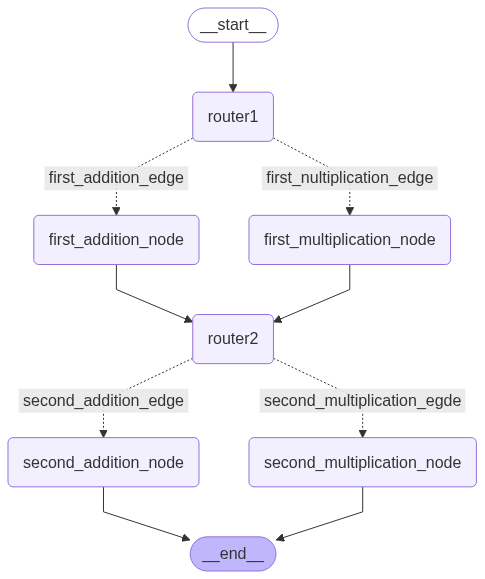

In [10]:
graph = StateGraph(AgentState)
graph.add_node("first_addition_node",first_addition_node)
graph.add_node("first_multiplication_node",first_multiplication_node)
graph.add_node("router1", lambda state: state)
graph.add_node("second_addition_node",second_addition_node)
graph.add_node("second_multiplication_node",second_multiplication_node)
graph.add_node("router2",lambda state:state)
graph.add_edge(START,"router1")
graph.add_conditional_edges(
    "router1",
    first_decision_node,
    {
        "first_addition_edge":"first_addition_node",
        "first_nultiplication_edge": "first_multiplication_node"
    }
)
graph.add_edge("first_addition_node","router2")
graph.add_edge("first_multiplication_node","router2")
graph.add_conditional_edges(
    "router2",
    second_decision_node,
    {
        "second_addition_edge":"second_addition_node",
        "second_multiplication_egde":"second_multiplication_node"
    }
)
graph.add_edge("second_addition_node",END)
graph.add_edge("second_multiplication_node",END)
app = graph.compile()
app

In [13]:
initial_state = AgentState(number1 = 10, operation1="+", number2 = 5, number3 = 7, number4=2, operation2="+", finalNumber= 0, finalNumber2 = 0)

In [14]:
print(app.invoke(initial_state))

{'number1': 10, 'operation1': '+', 'number2': 5, 'number3': 7, 'operation2': '+', 'number4': 2, 'finalNumber1': 15, 'finalNumber2': 9}
